In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing training and testing data

In [3]:
df_train=pd.read_csv(r'C:\Users\91964\Desktop\FlipRobo\projects\projects-6\Malignant-Comments-Classifier-Project--1---1-\Malignant Comments Classifier Project\train.csv')

In [103]:
df_test=pd.read_csv(r'C:\Users\91964\Desktop\FlipRobo\projects\projects-6\Malignant-Comments-Classifier-Project--1---1-\Malignant Comments Classifier Project\test.csv')

In [5]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [68]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
# Joining both data set
df=pd.concat([df_train,df_test])
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",NaN,NaN,NaN,NaN,NaN,NaN
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,NaN,NaN,NaN,NaN,NaN,NaN
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",NaN,NaN,NaN,NaN,NaN,NaN
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_train.shape

(159571, 8)

In [9]:
df_test.shape

(153164, 2)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
# There are total 159571 rows and 8 columns present in the training dataset
# id and comment_text are object type other 6 columns are int type
# memory usage 9.7+MB

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [13]:
# There are total 153164 rows and 2 columns present in the testing dataset
# id and comment_text are object type o
# memory usage 2.3+MB

In [14]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_train.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

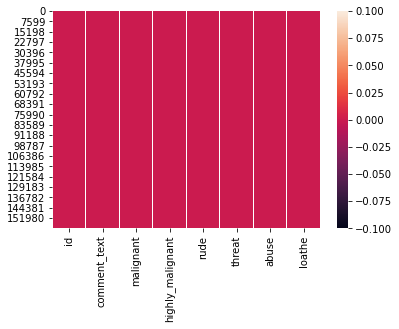

In [16]:
sns.heatmap(df_train.isna())

In [17]:
import missingno

<AxesSubplot:>

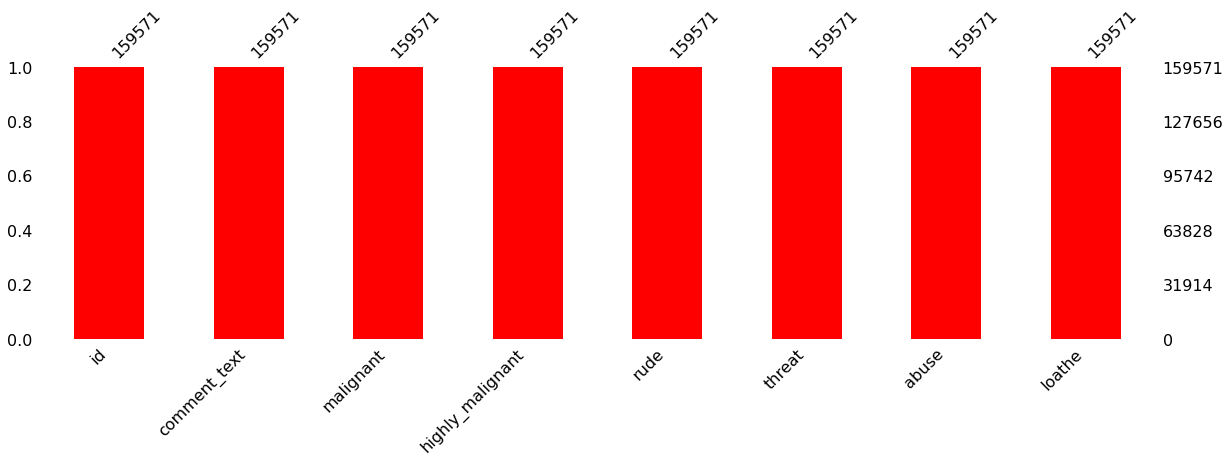

In [18]:
missingno.bar(df_train,figsize=(20,5),color='red')

In [19]:
#There is no null value present in the train dataset

In [10]:
# deleting unneccessary column
df_train=df_train.drop(columns='id',axis=1)
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [11]:
# Now total 7 columns are present in training dataset

In [12]:
#though id column has no use here so i droped it 

In [13]:
# checking lengh of the comments and adding a new column

In [14]:
df_train['length_text']=df_train['comment_text'].str.len()

In [15]:
#converting comment_text column into lower case 

In [16]:
df_train['comment_text']=df_train['comment_text'].str.lower()
df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_text
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [17]:
# replacing \n with ' '
df_train['comment_text']=df_train['comment_text'].str.replace('\n',' ')

In [18]:
import nltk
nltk.download('stopwords',quiet=True)
nltk.download('punkt',quiet=True)
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize,regexp_tokenize

In [19]:
from wordcloud import WordCloud

In [20]:
df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_text
0,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,""" more i can't make any real suggestions on im...",0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [21]:
# keeping letters,numbers and words(can't,don't etc)
df_train['comment_text']=df_train['comment_text'].apply(lambda x:' '.join(regexp_tokenize(x,'[a-z]+')))

In [22]:
# removing stopwords and punctuation
stop_words=set(stopwords.words('english'))
# updating the stopwords
for ch in range(ord('a'),ord('z')+1):
    stop_words.update

In [23]:
# Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

In [24]:
# Checking the new list of stop words
print("New list of custom stop words are:\n\n")
print(stop_words)

New list of custom stop words are:


{'ain', 'over', 'she', "isn't", 'also', 'nt', 'between', 'how', 'won', "that'll", "he's", 'does', "mustn't", 'with', "i'll", 'just', "can't", 'omg', 'can', 'haven', 'those', 'out', 'will', "doesn't", 't', 'd', 'about', 'what', 'he', 'myself', 'mightn', 'again', "there's", "i'm", 'here', "mightn't", 'shouldn', "shan't", 'me', 'these', "haven't", "didn't", 'only', 'you', 'hadn', 'ur', 'them', 'hi', 'ours', 'each', "hadn't", "you'd", 'below', 'our', 'all', 'too', 'than', 'yourselves', 'as', 'that', 'where', 'further', 'when', 'ma', 'after', 'his', 'before', 'its', 'm', 'through', "wasn't", 'other', 'very', 'theirs', 'up', "you've", 'at', 'such', 'should', "d'aww", 'on', 'which', 'the', 'himself', 'lmfao', 'in', 'wasn', 'yourself', 'from', 'own', 'ok', 'o', "couldn't", "should've", 'being', "wouldn't", 'smh', 'so', 'their', 'into', 'if', 'or', 'now', 'under', 've', 'were', 'doesn', 'him', 'most', 'herself', 'bbq', "she'll", 'this', 'isn', 'having', 'its

In [25]:
# Removing stop words
df_train.comment_text = df_train.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

# Removing punctuations
df_train.comment_text = df_train.comment_text.str.replace("[^\w\d\s]","")

# Checking any 10 random rows to see the applied changes
df_train.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_text
117230,hello darth mhaw new wikipedia hope make new c...,0,0,0,0,0,0,217
58127,give break first hitler youth religious nut re...,0,0,0,0,0,0,1118
108508,making sure article baffling irrelevant people...,0,0,0,0,0,0,199
25936,sorry really interested opinion fact people op...,0,0,0,0,0,0,418
75393,interesting gaylynn exist utah link nice try jeff,0,0,0,0,0,0,72
5665,joffrey death congratulations excellent articl...,0,0,0,0,0,0,219
25628,sulayman arabic beginning article correction s...,0,0,0,0,0,0,333
60173,good grief seem wandered le salon mesdames som...,0,0,0,0,0,0,154
98622,involved admin blocking opposition feloniousmo...,0,0,0,0,0,0,1282
54158,invite consider novels wikiproject collaborati...,0,0,0,0,0,0,469


In [26]:
# Stemming words
stem = SnowballStemmer('english')
df_train.comment_text = df_train.comment_text.apply(lambda x: ' '.join(stem.stem(word) for word in word_tokenize(x)))

# Checking any 10 random rows to see the applied changes
df_train.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_text
38523,suspect sockpuppetri editor king heart pleas w...,0,0,0,0,0,0,1226
46057,vandal gene pool disclaim gene pool psudonym r...,0,0,0,0,0,0,509
149145,may utc user gfhandel clear correct dulithgow ...,0,0,0,0,0,0,1670
40805,edit revert repli,0,0,0,0,0,0,39
5900,revert recent edit made articl user talk provi...,0,0,0,0,0,0,382
113042,speedi delet flouti tag place flouti request s...,0,0,0,0,0,0,1345
154799,question develop articl perhap someon know joh...,0,0,0,0,0,0,635
142874,dear macraki one gave exact solut first place ...,0,0,0,0,0,0,602
91013,file christian democrat parti el salvador logo...,0,0,0,0,0,0,433
45837,let take one time basic argu wp otherstuffexis...,0,0,0,0,0,0,161


In [27]:
df_train['cleaned_text']=df_train['comment_text'].str.len()
df_train.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_text,cleaned_text
77721,photo king cross st april request imag,0,0,0,0,0,0,70,38
1395,love wikipedia place hilari articl protect pos...,0,0,0,0,0,0,505,263
132904,yes hijack section ask projector,0,0,0,0,0,0,64,32
100221,vfd reform leav think anyth need delet delet r...,0,0,0,0,0,0,180,91
100606,stoke wakelin speedi delet regard delet articl...,0,0,0,0,0,0,1376,718
33625,sourc articl academi award,0,0,0,0,0,0,47,26
125422,survey found reader thought bore book ever rea...,0,0,0,0,0,0,556,315
16440,thank link yet read entir peper yet read far i...,0,0,0,0,0,0,231,122
110031,npov tag articl pov fill sentenc like iranian ...,0,0,0,0,0,0,3629,2006
8817,sorri suppos england week must night tell bob ...,0,0,0,0,0,0,188,64


In [39]:
# Visualization

<AxesSubplot:xlabel='malignant', ylabel='count'>

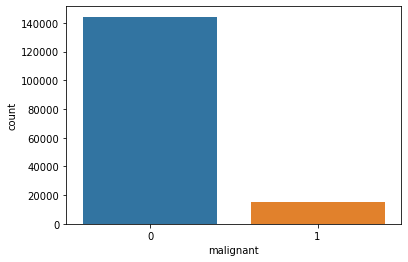

In [40]:
sns.countplot(df_train['malignant'])

In [41]:
# malignant comments are very low 

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

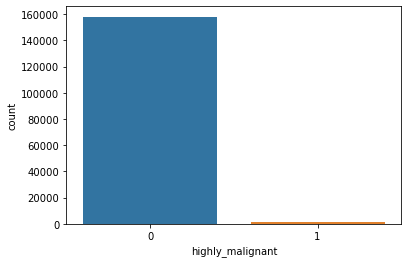

In [42]:
sns.countplot(df_train['highly_malignant'])

In [43]:
# highly_malignant comments are very low 

<AxesSubplot:xlabel='rude', ylabel='count'>

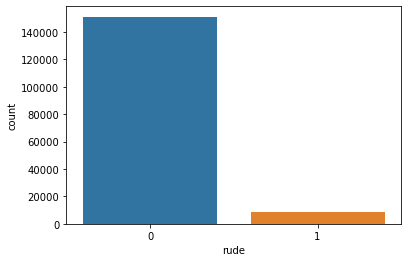

In [44]:
sns.countplot(df_train['rude'])

In [45]:
# rude comments are low 

<AxesSubplot:xlabel='threat', ylabel='count'>

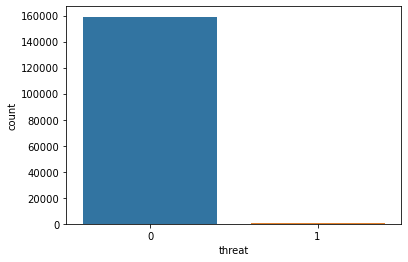

In [46]:
sns.countplot(df_train['threat'])

In [47]:
# threat comments are low 

<AxesSubplot:xlabel='abuse', ylabel='count'>

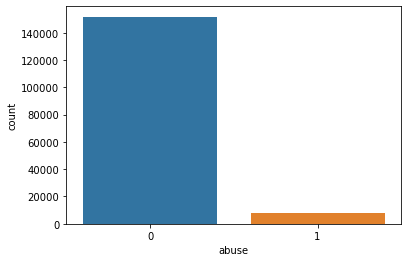

In [48]:
sns.countplot(df_train['abuse'])

In [49]:
# abuse comments are low 

<AxesSubplot:xlabel='loathe', ylabel='count'>

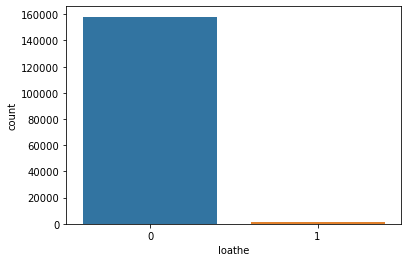

In [50]:
sns.countplot(df_train['loathe'])

In [51]:
# loathe comments are very low 

In [28]:
col_output=['malignant','highly_malignant','rude','threat','abuse','loathe']
target_df_train = df_train[col_output]

df_train['bad'] =df_train[col_output].sum(axis =1)
print(df_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64


In [29]:
df_train['bad']=df_train['bad']>0
df_train['bad']=df_train['bad'].astype(int)

In [30]:
df_train['bad'].value_counts()

0    143346
1     16225
Name: bad, dtype: int64

<AxesSubplot:xlabel='bad', ylabel='count'>

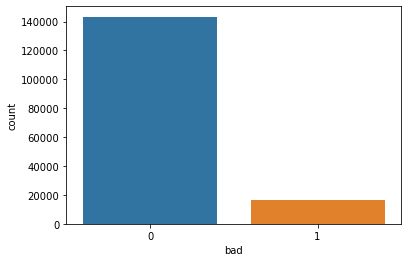

In [31]:
sns.countplot(x='bad',data=df_train)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
tf_idf=TfidfVectorizer(max_features=10000,stop_words='english')
x=tf_idf.fit_transform(df_train['comment_text'])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
y=df_train['bad']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((119678, 10000), (39893, 10000), (119678,), (39893,))

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
from sklearn.metrics import log_loss

In [85]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.9406412152507959

In [86]:
y_pred = dt.predict(x_test)
print(confusion_matrix(y_test,dt.predict(x_test)))
print(classification_report(y_test, y_pred))

[[34663  1171]
 [ 1197  2862]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35834
           1       0.71      0.71      0.71      4059

    accuracy                           0.94     39893
   macro avg       0.84      0.84      0.84     39893
weighted avg       0.94      0.94      0.94     39893



In [87]:
print(log_loss(y_test, y_pred))

2.0502032645260897


In [41]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.9579374827664001

In [42]:
y_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc.predict(x_test)))
print(classification_report(y_test, y_pred))

[[35401   433]
 [ 1245  2814]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35834
           1       0.87      0.69      0.77      4059

    accuracy                           0.96     39893
   macro avg       0.92      0.84      0.87     39893
weighted avg       0.96      0.96      0.96     39893



In [43]:
print(log_loss(y_test, y_pred))

1.4527965561965113


In [91]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9578372145489183

In [92]:
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,lr.predict(x_test)))
print(classification_report(y_test, y_pred))

[[35625   209]
 [ 1473  2586]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35834
           1       0.93      0.64      0.75      4059

    accuracy                           0.96     39893
   macro avg       0.94      0.82      0.87     39893
weighted avg       0.96      0.96      0.95     39893



In [93]:
print(log_loss(y_test, y_pred))

1.4562552079839246


In [94]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9201363647757752

In [95]:
y_pred =knn.predict(x_test)
print(confusion_matrix(y_test,knn.predict(x_test)))
print(classification_report(y_test, y_pred))

[[35564   270]
 [ 2916  1143]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     35834
           1       0.81      0.28      0.42      4059

    accuracy                           0.92     39893
   macro avg       0.87      0.64      0.69     39893
weighted avg       0.91      0.92      0.90     39893



In [96]:
print(log_loss(y_test, y_pred))

2.758397650853323


In [97]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
ada.score(x_test,y_test)

0.9489634773017823

In [98]:
y_pred =ada.predict(x_test)
print(confusion_matrix(y_test,ada.predict(x_test)))
print(classification_report(y_test, y_pred))

[[35469   365]
 [ 1671  2388]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     35834
           1       0.87      0.59      0.70      4059

    accuracy                           0.95     39893
   macro avg       0.91      0.79      0.84     39893
weighted avg       0.95      0.95      0.94     39893



In [99]:
print(log_loss(y_test, y_pred))

1.7627463613441006


In [100]:
gb=GradientBoostingClassifier()

In [101]:
gb.fit(x_train,y_train)
gb.score(x_test,y_test)

0.9428721830897652

In [102]:
y_pred =gb.predict(x_test)
print(confusion_matrix(y_test,gb.predict(x_test)))
print(classification_report(y_test, y_pred))

[[35732   102]
 [ 2177  1882]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35834
           1       0.95      0.46      0.62      4059

    accuracy                           0.94     39893
   macro avg       0.95      0.73      0.80     39893
weighted avg       0.94      0.94      0.93     39893



In [103]:
print(log_loss(y_test, y_pred))

1.9731269386343306


In [104]:
import xgboost
xgb=xgboost.XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)

[22:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9564083924498032

In [105]:
y_pred =xgb.predict(x_test)
print(confusion_matrix(y_test,xgb.predict(x_test)))
print(classification_report(y_test, y_pred))

[[35601   233]
 [ 1506  2553]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35834
           1       0.92      0.63      0.75      4059

    accuracy                           0.96     39893
   macro avg       0.94      0.81      0.86     39893
weighted avg       0.96      0.96      0.95     39893



In [106]:
print(log_loss(y_test, y_pred))

1.5056054560186232


In [98]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv=cross_val_score(rfc, x, y, cv=5, scoring='accuracy').mean()

In [ ]:
cv=cross_val_score(lr, x, y, cv=10, scoring='accuracy').mean()

In [ ]:
cv=cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean()

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
params={"criterion":['gini','entropy'],
            "max_depth" :[1,2,3,4],
           "min_samples_leaf":[2,3,4],
           "max_leaf_nodes":[3,5,7],
           "min_samples_split":[2,4]
            }

In [76]:
grid_search=GridSearchCV(estimator=rfc,param_grid=params)

In [77]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4], 'max_leaf_nodes': [3, 5, 7],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 4]})

In [78]:
best_parameters=grid_search.best_params_

In [79]:
best_parameters

{'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [80]:
clf=RandomForestClassifier(criterion='gini' ,max_depth= 2,min_samples_leaf= 4,max_leaf_nodes= 4,min_samples_split= 4)

In [81]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_leaf_nodes=4, min_samples_leaf=4,
                       min_samples_split=4)

In [82]:
y_pred_rfc=clf.predict(x_test)

In [83]:
accuracy_score(y_test,y_pred_rfc)

0.8982528263103803

In [84]:
print(log_loss(y_test, y_pred_rfc))

3.514222880879915


In [49]:
# comparing actual values with predicted values

actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred.sample(10)

,Actual,Predicted
1790,0,0
149539,0,0
77726,0,0
118321,0,0
90834,0,0
66586,0,0
120524,0,0
84490,0,0
71379,0,0
42367,0,0


In [59]:
# Saving model
import joblib
joblib.dump(rfc,'Malignant_comments.pkl')

['Malignant_comments.pkl']

In [104]:
#Remove null values.
if df_test.isnull().sum()[1] != 0:
    df_test.dropna(inplace=True)

In [105]:
#Drop coulmn id.
df_test.drop(columns=['id'],inplace=True)

In [106]:
#Convert comment text to lower case and replace '\n' with single space.
df_test["comment_text"] = df_test.comment_text.str.lower()
df_test["comment_text"] = df_test.comment_text.str.replace('\n',' ')

In [107]:
#Keep only text data i.e., a-z' and remove other data from comment text.
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [108]:
#Remove stopwords.
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

In [109]:
#Remove punctuations.
df_test.comment_text = df_test.comment_text.str.replace("[^\w\d\s]","")

In [120]:
#Convert text to vectors using TfidfVectorizer.
tf_idf = TfidfVectorizer(analyzer = 'word', max_features=10000)
test_features = tf_idf.fit_transform(df_test.comment_text).toarray()

In [111]:
#Load saved or serialized model and predict.
model_loaded = joblib.load('Malignant_comments.pkl')

In [112]:
#Make predictions and view the results.
predict_test = model_loaded.predict(test_features)

In [ ]:
#Saving predicted values into a CSV file.
pd.DataFrame(predict_test.toarray()).to_csv('Predicted_test_output.csv')

In [ ]:
#Saving predicted values into a CSV file.
predict_test.to_csv('Predicted_test_output.csv')

In [ ]:
df1 = pd.read_csv('Predicted_test_output.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)

df2=df_test.copy()
df_= pd.concat([df2, df1], axis=1)
df_

In [ ]:
df_.to_csv('test_dataset_predictions.csv', index=False)